## 6.6 分析树

随着我们的树数据结构的实现完成，我们现在看一个例子，说明如何使用树来解决一些真正
的问题。在本节中，我们将讨论分析树。 分析树可以用于表示诸如句子或数学表达式的真实
世界构造。

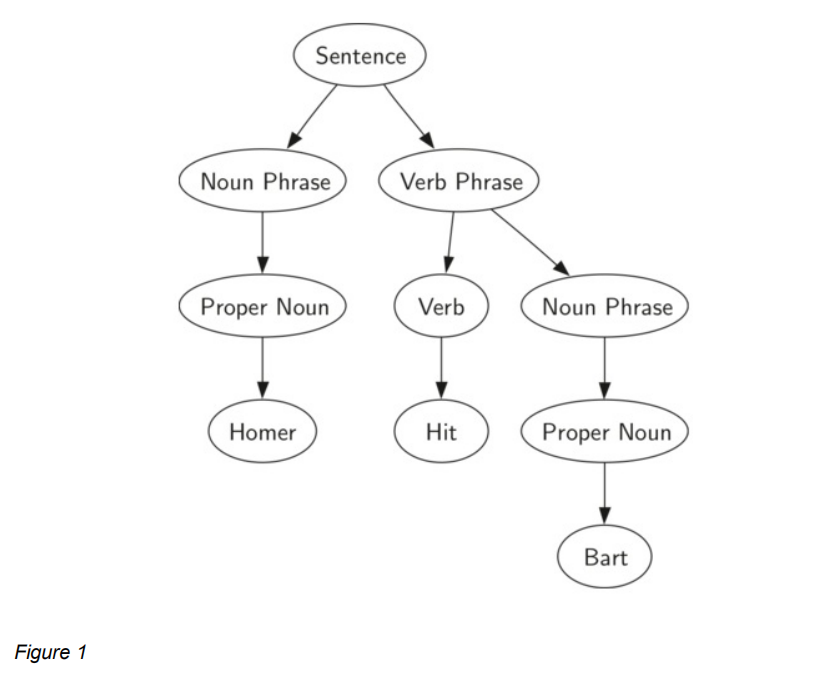

Figure 1 展示了一个简单句子的层次结构。 将句子表示为树结构允许我们通过使用子树来处
理句子的各个部分。

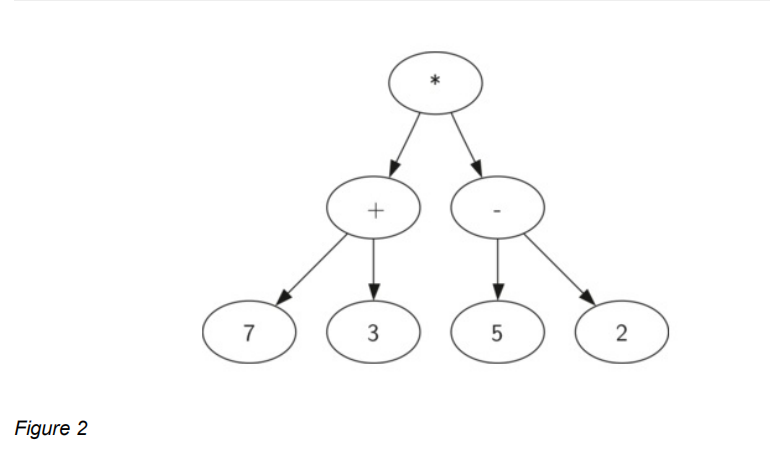

我们还可以表示诸如 （（7 + 3）*（5-2）） 数学表达式作为分析树，如 Figure 2 所示。我们
早看过完全括号表达式，所以我们知道这个表达式是什么？我们知道乘法具有比加法或减法
更高的优先级。由于括号，我们知道在做乘法之前，我们必须计算括号里面的加法和减法表
达式。树的层次结构有助于我们了解整个表达式的求值顺序。在我们计算顶层乘法之前，我
们必须计算子树中的加法和减法。作为左子树的加法结果为10。减法，即右子树，计算结果
为3。使用树的层次结构，我们可以简单地用一个节点替换整个子树，一旦我们计算了表达式
中这些子树。这个替换过程给出了 Figure 3 所示的简化树。

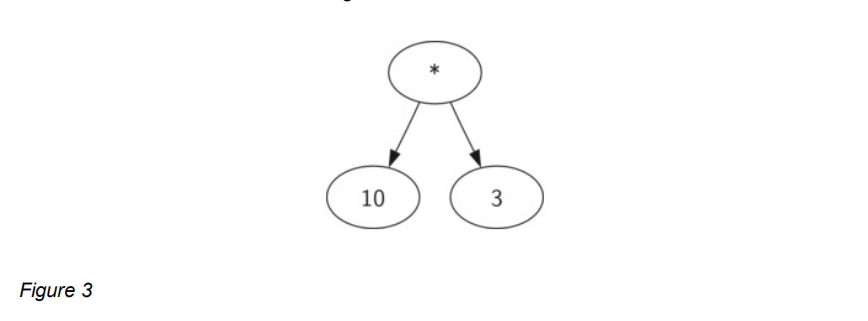

在本节的其余部分，我们将更详细地检查分析树。 特别的，我们会看：
* 如何从完全括号的数学表达式构建分析树。
* 如何评估存储在分析树中的表达式。
* 如何从分析树中恢复原始数学表达式。

构建分析树的第一步是将表达式字符串拆分成符号列表。 有四种不同的符号要考虑：左括号，右括号，运算符和操作数。 我们知道，每当我们读一个左括号，我们开始一个新的表达式，因此我们应该创建一个新的树来对应于该表达式。 相反，每当我们读一个右括号，我们就完成了一个表达式。 我们还知道操作数将是叶节点和它们的操作符的子节点。 最后，我们知道每个操作符都将有一个左和右孩子。

使用上面的信息，我们可以定义四个规则如下：

* 如果当前符号是 '(' ，添加一个新节点作为当前节点的左子节点，并下降到左子节点。
* 如果当前符号在列表 ['+'，' - '，'/'，'*'] 中，请将当前节点的根值设置为由当前符号
* 表示的运算符。 添加一个新节点作为当前节点的右子节点，并下降到右子节点。
* 如果当前符号是数字，请将当前节点的根值设置为该数字并返回到父节点。
* 如果当前令牌是 ')' ，则转到当前节点的父节点。

在编写 Python 代码之前，让我们看看上面列出的规则的一个例子。我们将使用表达
式 （3+（4 * 5）） 。 我们将把这个表达式解析成下面的字符标记列表
['('，'3'，'+'，'('，'4'，'*'，'5'，')'，')'] 。 最初，我们将使用由空根节点组成的分析树
开始。 Figure 4 展示了当每个新符号被处理时分析树的结构和内容。


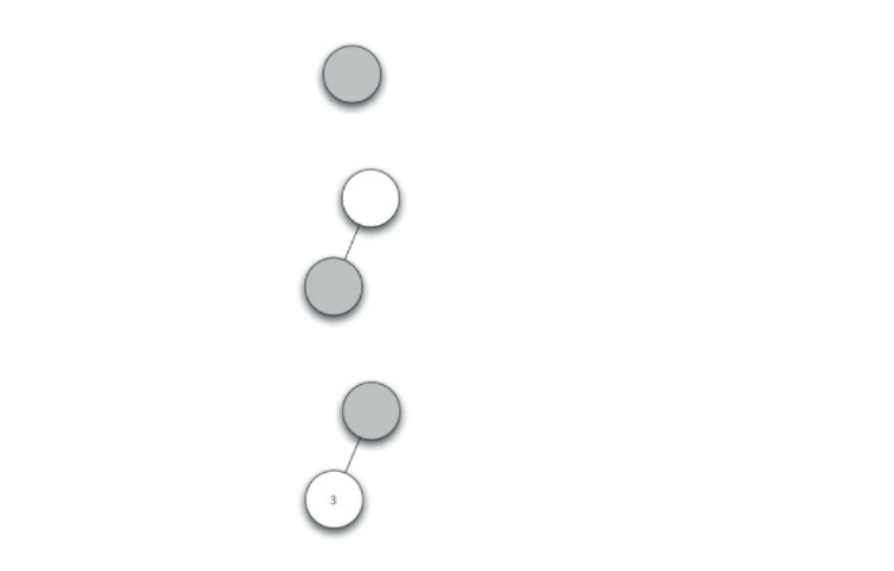

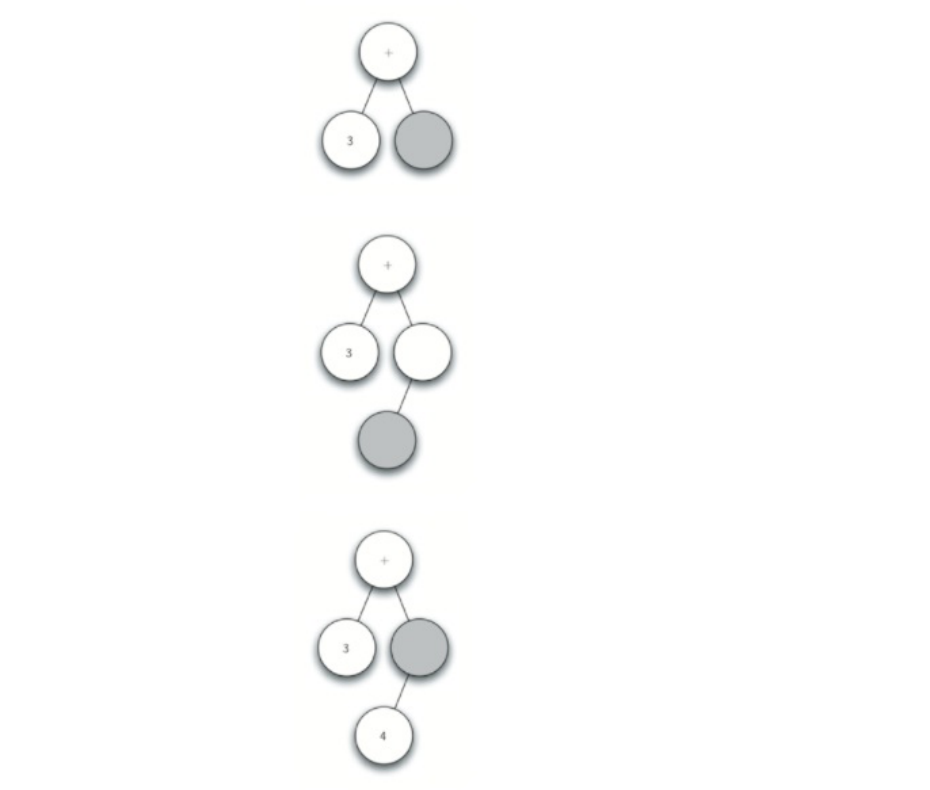

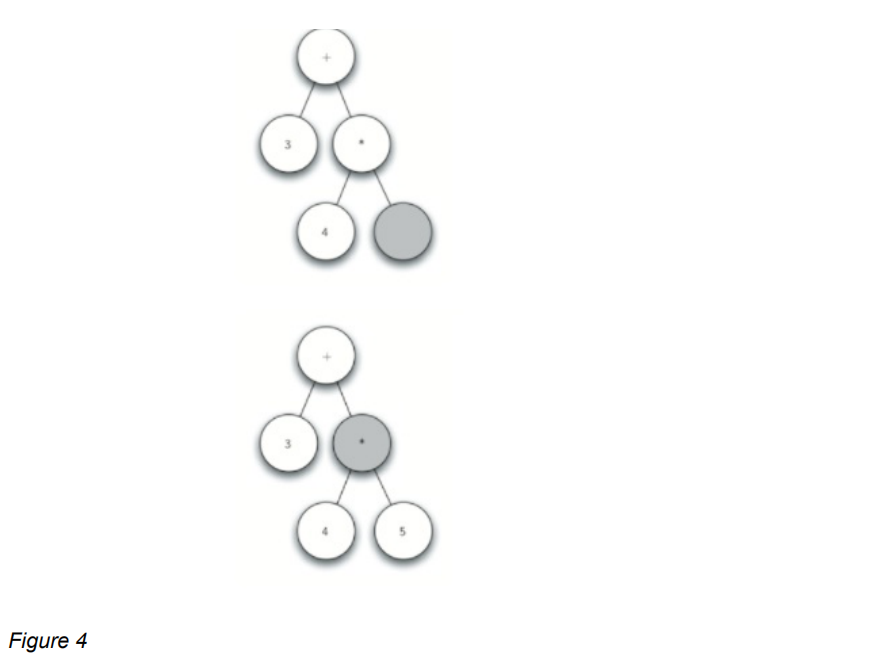

使用 Figure 4，让我们一步一步地浏览示例：

a. 创建一个空树。

b. 读取 ( 作为第一个标记。按规则1，创建一个新节点作为根的左子节点。使当前节点到这个
新子节点。


c. 读取 3 作为下一个符号。按照规则3，将当前节点的根值设置为3，使当前节点返回到父节
点。

d. 读取 + 作为下一个符号。根据规则2，将当前节点的根值设置为+，并添加一个新节点作为
右子节点。新的右子节点成为当前节点。

e. 读取 ( 作为下一个符号，按规则1，创建一个新节点作为当前节点的左子节点，新的左子节
点成为当前节点。

f. 读取 4 作为下一个符号。根据规则3，将当前节点的值设置为 4。使当前节点返回到父节
点。

g. 读取 作为下一个符号。根据规则2，将当前节点的根值设置为 ，并创建一个新的右子节
点。新的右子节点成为当前节点。


h. 读取 5 作为下一个符号。根据规则3，将当前节点的根值设置为5。使当前节点返回到父节
点。


i. 读取 ) 作为下一个符号。根据规则4，使当前节点返回到父节点。


j. 读取 ) 作为下一个符号。根据规则4，使当前节点返回到父节点 + 。没有+ 的父节点，所以
我们完成创建。

从上面的例子，很明显，我们需要跟踪当前节点以及当前节点的父节点。树接口为我们提供
了一种通过 getLeftChild 和 getRightChild 方法获取节点的子节点的方法，但是我们如何
跟踪父节点呢？当我们遍历树时，保持跟踪父对象的简单解决方案是使用栈。每当我们想下
降到当前节点的子节点时，我们首先将当前节点入到栈上。当我们想要返回到当前节点的父
节点时，我们将父节点从栈中弹出。


In [46]:
# Activecode1

from pythonds.basic.stack import Stack
from pythonds.trees.binaryTree import BinaryTree

def buildParseTree(fpexp):
    fplist = fpexp.split()
    pStack = Stack()
    eTree = BinaryTree('')
    pStack.push(eTree)
    currentTree = eTree
    for i in fplist:
        if i == '(':
            currentTree.insertLeft('')
            pStack.push(currentTree)
            currentTree = currentTree.getLeftChild()
        elif i not in ['+', '-', '*', '/', ')']:
            currentTree.setRootVal(int(i))
            parent = pStack.pop()
            currentTree = parent
        elif i in ['+', '-', '*', '/']:
            currentTree.setRootVal(i)
            currentTree.insertRight('')
            pStack.push(currentTree)
            currentTree = currentTree.getRightChild()
        elif i == ')':
            currentTree = pStack.pop()
        else:
            raise ValueError
    return eTree

pt = buildParseTree("( ( 10 + 5 ) * 3 )")
pt.postorder() #defined and explained in the next section
print(pt)

10
5
+
3
*


用于构建分析树的四个规则被编码为 ActiveCode 1 的行 11,15,19 和 24 上的 if 语句的前四个
子句。在每种情况下，可以看到代码实现了如上所述的规则，与几个调用 BinaryTree 或
Stack 方法。我们在这个函数中唯一的错误检查是在 else 子句中，如果我们从列表中得到一
个我们不认识的 token，我们引发一个ValueError异常。


现在我们已经构建了一个分析树，我们可以用它做什么？作为第一个例子，我们将编写一个
函数来评估分析树，返回数值结果。要写这个函数，我们将利用树的层次性。回想一下
Figure 2。我们可以用 Figure 3 中所示的简化树替换原始树。这表明我们可以编写一个算法，
通过递归地评估每个子树来评估一个分析树。

正如我们对过去的递归算法所做的，我们将通过识别基本情况来开始递归评价函数的设计。
对树进行操作的递归算法的基本情况是检查叶节点。在分析树中，叶节点将始终是操作数。
由于整数和浮点等数值对象不需要进一步解释，因此 evaluate 函数可以简单地返回存储在
叶节点中的值。将函数移向基本情况的递归步骤是在当前节点的左子节点和右子节点上调用
evaluate。递归调用有效地使我们沿着树向着叶节点移动。


为了将两个递归调用的结果放在一起，我们可以简单地将存储在父节点中的运算符应用于从
评估这两个子节点返回的结果。在 Figure 3的示例中，我们看到根的两个孩子计算得出结
果，即 10 和 3。应用乘法运算符给我们一个最终结果 30。

递归求值函数的代码如 Listing 1 所示。首先，我们获取对当前节点的左子节点和右子节点的
引用。如果左和右孩子都为 None ，那么我们知道当前节点实际上是一个叶节点。此检查在
行 7。如果当前节点不是叶节点，请查找当前节点中的运算符，并将其应用于递归计算左右子
节点的结果。

为了实现算术，我们使用具有键 '+'，' - '，'*' 和 '/' 的字典。存储在字典中的值是来自
Python 的运算符模块的函数。运算符模块为我们提供了许多常用操作符的功能。当我们在字
典中查找一个运算符时，检索相应的函数对象。由于检索的对象是一个函数，我们可以用通
常的方式 function(param1，param2) 调用它。因此，查找 opers['+'](2,2) 等效
于 operator.add(2,2) 。

In [ ]:
def evaluate(parseTree):
    opers = {'+':operator.add, '-':operator.sub, '*':operator.mul, '/':operator.truediv}
    leftC = parseTree.getLeftChild()
    rightC = parseTree.getRightChild()
    if leftC and rightC:
        fn = opers[parseTree.getRootVal()]
        return fn(evaluate(leftC),evaluate(rightC))
else:
return parseTree.getRootVal()